# Library Yang Dibutuhkan

#**Nama : Charles Dometian**

#**Email : charles.dometian@gmail.com**

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load Data

In [ ]:
# Load data
from tensorflow.keras.datasets import cifar10

# Load the training and test split of the cifar10 dataset
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
train_shape = training_images.shape
test_shape = test_images.shape

print(f"Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}) pada data gambar latih")
print(f"Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}) pada data gambar uji")

Terdapat 50000 contoh dengan bentuk (32, 32) pada data gambar latih
Terdapat 10000 contoh dengan bentuk (32, 32) pada data gambar uji


# Data Preprarasion

In [ ]:
# Normalisasi nilai piksel
training_images = training_images / 255
test_images = test_images / 255

# Reshape
training_images = np.reshape(training_images, (training_images.shape[0], -1))
test_images = np.reshape(test_images, (test_images.shape[0], -1))


# Membangun Model

In [ ]:
inputs = Input(shape=(3072,))
h_encode = Dense(512, activation='relu')(inputs)
h_encode = Dense(256, activation='relu')(h_encode)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)

coded = Dense(32, activation='relu')(h_encode)

h_decode = Dense(64, activation='relu')(coded)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
h_decode = Dense(512, activation='relu')(h_decode)

outputs = Dense(3072, activation='sigmoid')(h_decode)
autoencoder = Model(inputs, outputs)

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])
autoencoder.fit(training_images, training_images,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/10
500/500 [==============================] - 11s 9ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 8/10
500/500 [==============================] - 3s 6ms/step - loss: 0

# Prediksi dan Visualisasi

In [ ]:
predicted = autoencoder.predict(test_images)

313/313 [==============================] - 1s 2ms/step


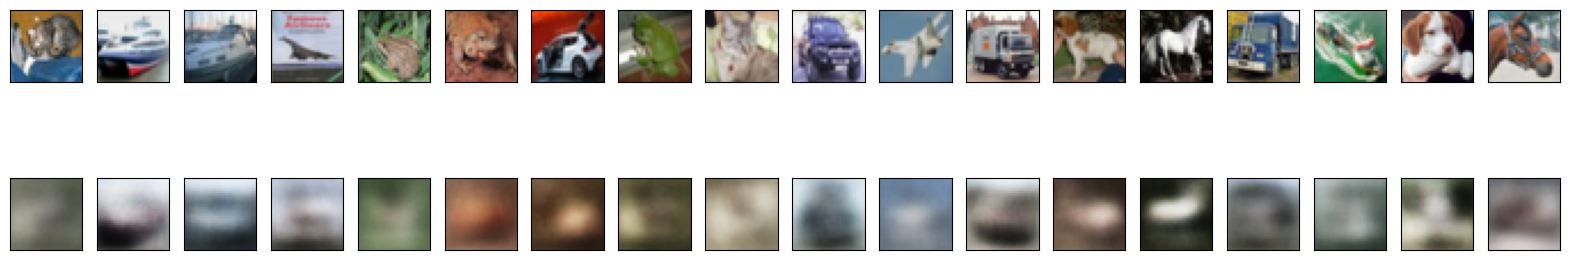

In [ ]:
n = 18
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_images[i].reshape(32, 32, 3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(predicted[i].reshape(32, 32, 3), cmap='gray')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
